<a href="https://colab.research.google.com/github/ArturoVa/Brain-Cancer-Detection-CNN/blob/main/MRI_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_1157.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0125.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0699.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_1273.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0374.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_1370.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_1171.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_1484.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0816.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0085.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0029.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_1285.jpg
/kaggle/input/brain-tumor-mri-dataset/Training/notumor/Tr-no_0210.jpg
/kaggle/input/brain-tumor-mri-dataset/T

In [ ]:
! pip install tensorflow

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
! ls /kaggle/input/brain-tumor-mri-dataset/Training/

glioma	meningioma  notumor  pituitary


In [ ]:
import pathlib
classTypes = ['glioma', 'meningioma', 'notumor', 'pituitary']
path = r'/kaggle/input/brain-tumor-mri-dataset/'

training = [path+'Training/'+i for i in classTypes ]


testing = [path+'Testing/'+i for i in classTypes ]


sumTraining = len(list(pathlib.Path(path+'Training/').glob('*/*.jpg')))
sumTest= len(list(pathlib.Path(path+'Testing/').glob('*/*.jpg')))
proportionTraining = []
proportionTesting = []

print('Training')
for  index ,i in enumerate(training):
  path = pathlib.Path(i)
  print(classTypes[index],":",len(list(path.glob('*.jpg'))))
  proportionTraining.append(len(list(path.glob('*.jpg'))))
print("Total:",sumTraining)
print('Testing')
for index ,i in enumerate(testing):
  path = pathlib.Path(i)
  print(classTypes[index],":",len(list(path.glob('*.jpg'))))
  proportionTesting.append(len(list(path.glob('*.jpg'))))
print("Total:",sumTest)


Training
glioma : 1321
meningioma : 1339
notumor : 1595
pituitary : 1457
Total: 5712
Testing
glioma : 300
meningioma : 306
notumor : 405
pituitary : 300
Total: 1311


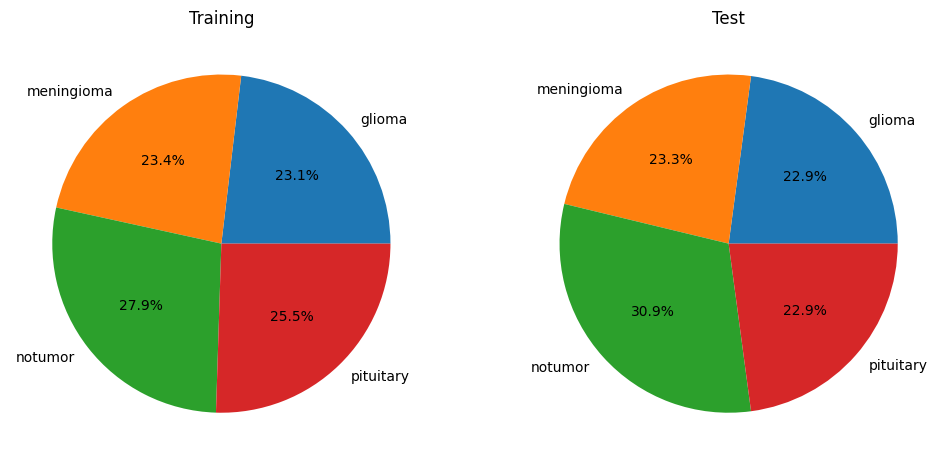

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(proportionTraining, labels=classTypes, autopct='%1.1f%%')
axes[0].set_title('Training')

axes[1].pie(proportionTesting, labels=classTypes, autopct='%1.1f%%')
axes[1].set_title('Test')


plt.show()

En general, el set de datos se ve bastante balanceado, no hay ninguna clase que tenga mucha mas presencia que otra

In [ ]:
training_glioma = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Training/glioma').glob('*.jpg'))
training_meningioma = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Training/meningioma').glob('*.jpg'))
training_notumor = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Training/notumor').glob('*.jpg'))
training_pituitary = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Training/pituitary').glob('*.jpg'))

testing_glioma = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Testing/glioma').glob('*.jpg'))
testing_meningioma = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma').glob('*.jpg'))
testing_notumor = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Testing/notumor').glob('*.jpg'))
testing_pituitary = list(pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary').glob('*.jpg'))

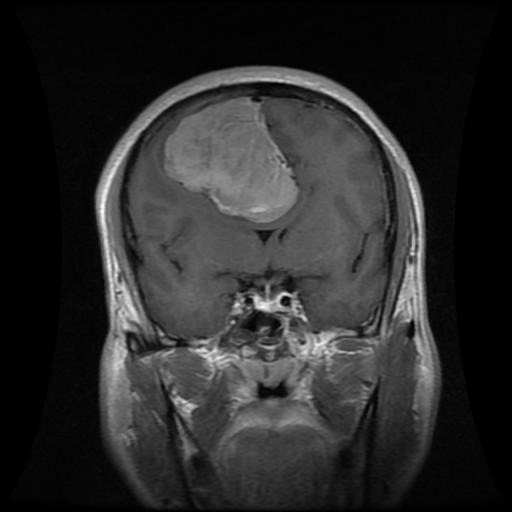

In [ ]:
PIL.Image.open(str(training_meningioma[0]))

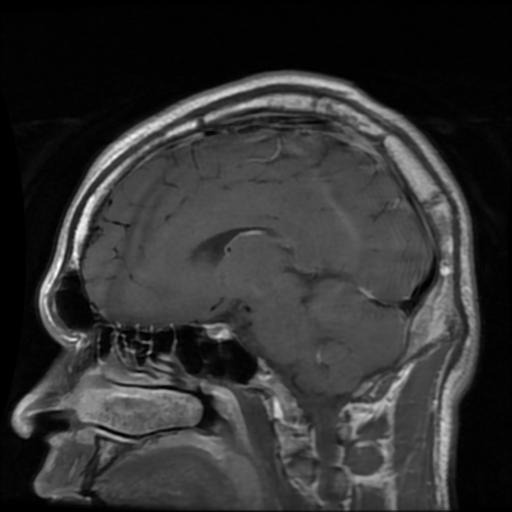

In [ ]:
PIL.Image.open(str(training_pituitary[0]))

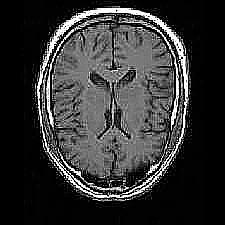

In [ ]:
PIL.Image.open(str(training_notumor[0]))

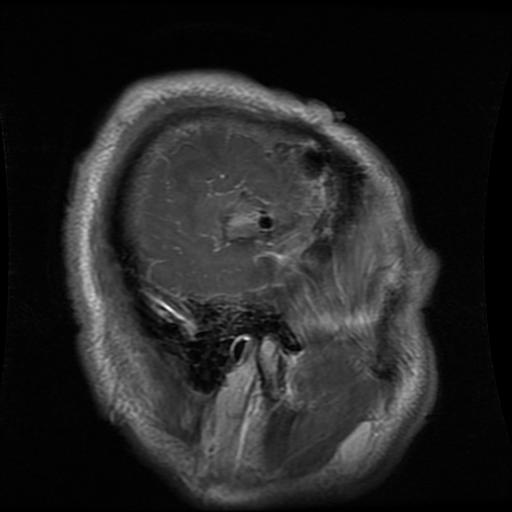

In [ ]:
PIL.Image.open(str(training_glioma[0]))

Estandarizamos las imagenes, a un tamaño mas pequeño

In [ ]:
# Parametros
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
training = pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Training/')
testing = pathlib.Path(r'/kaggle/input/brain-tumor-mri-dataset/Testing/')

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  training,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  training,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    testing,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1311 files belonging to 4 classes.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#normalization_layer = layers.Rescaling(1./255)

In [ ]:
num_classes = len(classTypes)

# Model arquitecture
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,156 (15.22 MB)

 Trainable params: 3,989,156 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Verificar si TensorFlow puede acceder a la GPU
gpu_available = tf.config.list_physical_devices('GPU')
print("GPUs disponibles:", len(gpu_available))

GPUs disponibles: 1


In [ ]:
with tf.device('/GPU:0'):
  epochs=30
  history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
  )

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.5868 - loss: 0.9712 - val_accuracy: 0.8319 - val_loss: 0.4575
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.8610 - loss: 0.3855 - val_accuracy: 0.9072 - val_loss: 0.2781
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9308 - loss: 0.2058 - val_accuracy: 0.9089 - val_loss: 0.2471
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9585 - loss: 0.1216 - val_accuracy: 0.8949 - val_loss: 0.2826
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9764 - loss: 0.0763 - val_accuracy: 0.9098 - val_loss: 0.2789
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9820 - loss: 0.0541 - val_accuracy: 0.9440 - val_loss: 0.2107
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9795 - loss: 0.0591 - val_accuracy: 0.9571 - val_loss: 0.1947
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9963 - loss: 0.0122 - val_acc

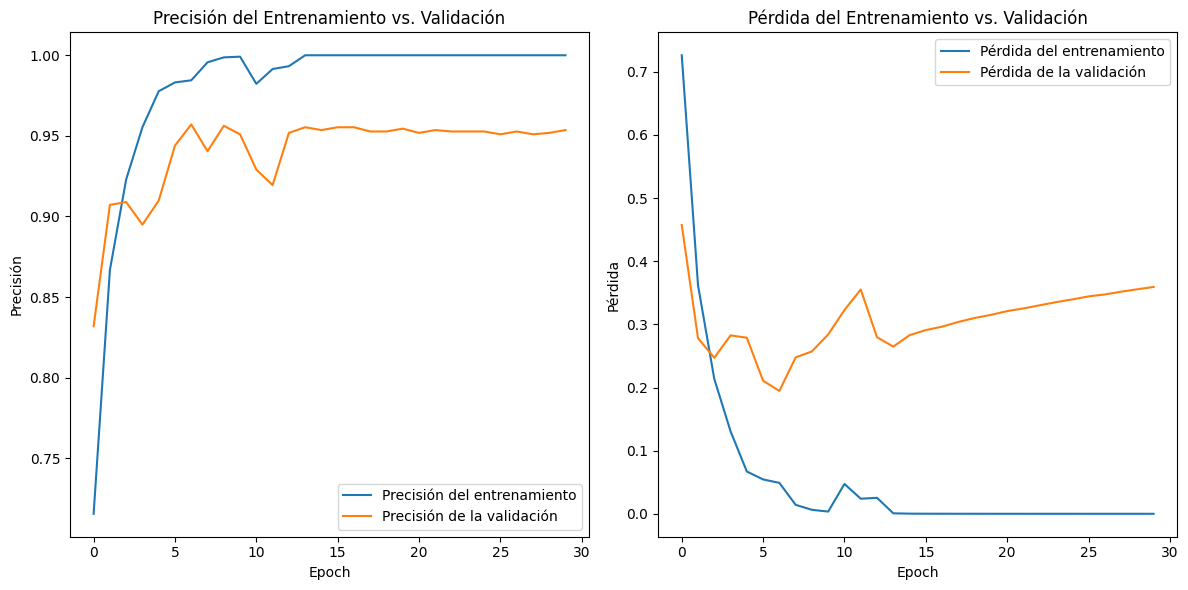

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión del entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de la validación')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión del Entrenamiento vs. Validación')

# Graficar la pérdida del entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida del entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de la validación')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.title('Pérdida del Entrenamiento vs. Validación')

plt.tight_layout()
plt.show()

In [ ]:
#Evaluacion con datos de prueba
test_loss, test_accuracy = model.evaluate(test_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.9560 - loss: 0.3257


In [ ]:
test_loss, test_accuracy

(0.3432350158691406, 0.9557589888572693)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Nombres de las clases en test_ds:", test_ds.class_names)

Nombres de las clases en test_ds: ['glioma', 'meningioma', 'notumor', 'pituitary']


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [ ]:
test_data = list(test_ds.unbatch().as_numpy_iterator())
test_images = np.array([item[0] for item in test_data])
test_labels = np.array([item[1] for item in test_data])

y_pred_probabilities = model.predict(test_images)
y_pred = np.argmax(y_pred_probabilities, axis=1)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"\nPrecisión del modelo (model.evaluate): {test_accuracy:.4f}")

print("\nInforme de Clasificación:")
print(classification_report(test_labels, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(test_labels, y_pred))

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9559 - loss: 0.3923

Precisión del modelo (model.evaluate): 0.9558

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       300
           1       0.93      0.89      0.91       306
           2       0.97      0.99      0.98       405
           3       0.97      1.00      0.98       300

    accuracy                           0.96      1311
   macro avg       0.95      0.95      0.95      1311
weighted avg       0.96      0.96      0.96      1311


Matriz de Confusión:
[[281  18   0   1]
 [ 12 271  14   9]
 [  2   1 402   0]
 [  0   1   0 299]]
